## 1. Problem Representation

- Design a data structure to represent the places and distances between them. This could be an adjacency matrix or a list of city objects with distance attributes.
- Implement a function to calculate the total distance of a given route (visiting order) for all the places.

Here's an example of a distance matrix representing distances between five places (Dorado Park, Khomasdal, Katutura, Eros, Klein Windhoek) measured in Kilometres:

| Places | Dorado Park | Khomasdal | Katutura | Eros | Klein Windhoek |
| ------ | -----------:| ---------:| --------:| ----:| --------------:|
|Dorado Park | 0 | 7 | 20 | 15 | 12 |
|Khomasdal | 10|  0|  6 | 14 | 18 |
|Katutura | 20 | 6 | 0 | 15 | 30 |
|Eros | 15 | 14 | 25 | 0 | 2 |
|Klein Windhoek | 12 | 18 | 30|  2 | 0 |

In [1]:
adjacency_matrix = [
    [0, 7, 20, 15, 12],
    [7, 0, 6, 14, 18],
    [20, 6, 0, 15, 30],
    [15, 14, 25, 0, 2],
    [12, 18, 30, 2, 0]
]

def calculate_total_distance(adjacency_matrix, route):
    total_distance = 0
    n = len(route)
    
    start = route[0]
    current = route[1]
    total_distance += adjacency_matrix[start][current]
    
    for i in range(1, n):
        previous = route[i - 1]
        current = route[i]
        total_distance += adjacency_matrix[previous][current]
    
    last = route[-1]
    total_distance += adjacency_matrix[last][start]
    
    return total_distance


sample_route = [0, 2, 3, 4, 1, 0]  
total_distance = calculate_total_distance(adjacency_matrix, sample_route)
print(f"Total distance for the route {sample_route}: {total_distance}")


Total distance for the route [0, 2, 3, 4, 1, 0]: 82


## 2. Hill Climbing Algorithm

- Implement the hill climbing algorithm for the TSP.
- Define a function that generates a random initial route visiting all places.
- Define a function to explore neighbouring solutions. This might involve swapping the order of two randomly chosen places in the current route.
- Implement the core logic of hill climbing: evaluate neighbouring routes, move to a better route if found, and repeat until reaching a local optimum (no improving neighbours).

In [2]:
import random

def generate_random_route(n):
    route = list(range(n))
    random.shuffle(route)
    return route 

def calculate_total_distance(adjacency_matrix, route):  
    total_distance = 0
    for i in range(len(route) - 1):
        current_place = route[i]
        next_place = route[i + 1]
        total_distance += adjacency_matrix[current_place][next_place]
    return total_distance

def explore_neighbors(route): 
    neighbors = []
    n = len(route)

    for i in range(n):
        for j in range(i + 1, n):
            neighbor = route.copy()
            neighbor[i], neighbor[j] = neighbor[j], neighbor[i]
            neighbors.append(neighbor)

    return neighbors

def hill_climbing(adjacency_matrix):
    n = len(adjacency_matrix)
    current_route = generate_random_route(n)
    current_distance = calculate_total_distance(adjacency_matrix, current_route)
    explored_routes = [current_route]

    while True:
        neighbors = explore_neighbors(current_route)
        best_neighbor = None
        best_distance = current_distance

        for neighbor in neighbors:
            neighbor_distance = calculate_total_distance(adjacency_matrix, neighbor)
            if neighbor_distance < best_distance:
                best_neighbor = neighbor
                best_distance = neighbor_distance

        if best_neighbor is None:
            break

        current_route = best_neighbor
        current_distance = best_distance
        explored_routes.append(current_route)

    return current_route, current_distance, explored_routes


adjacency_matrix = [
    [0, 7, 20, 15, 12],
    [7, 0, 6, 14, 18],
    [20, 6, 0, 15, 30],
    [15, 14, 25, 0, 2],
    [12, 18, 30, 2, 0]
]

best_route, best_distance, explored_routes = hill_climbing(adjacency_matrix)
print("Best Route:", best_route)
print("Best Distance:", best_distance)
print("Explored Route:", explored_routes)

Best Route: [2, 1, 0, 4, 3]
Best Distance: 27
Explored Route: [[4, 1, 0, 3, 2], [2, 1, 0, 3, 4], [2, 1, 0, 4, 3]]


## 3. Analysis and Comparison

- Analyse the time complexity of your hill climbing implementation.
- Run your hill climbing algorithm on various test cases with different numbers of places.
- Compare the total distance found by your algorithm with the optimal distance. You can calculate the optimal solution exhaustively for a small number of cities or use an existing optimal TSP solver for larger datasets (libraries or online tools).
- Analyse the impact of the number of iterations (number of times you explore neighbours) on the quality of the solution found by hill climbing (distance compared to optimal).

In [ ]:
import numpy as np
from scipy.optimize import minimize

class TravellingSalesmanSolver:
    def __init__(self, adjacency_matrix):
        self.adjacency_matrix = adjacency_matrix

    def calculate_distance(self, route):
        total_distance = 0
        num_places = len(route)
        for i in range(num_places - 1):
            from_place = int(route[i])
            to_place = int(route[i + 1])
            total_distance += self.adjacency_matrix[from_place][to_place]
        return total_distance

def hill_climbing(adjacency_matrix, num_iterations):
    num_places = len(adjacency_matrix)
    current_route = np.random.permutation(num_places)
    solver = TravellingSalesmanSolver(adjacency_matrix)
    current_distance = solver.calculate_distance(current_route)

    for _ in range(num_iterations):
        neighbors = []
        for i in range(num_places - 1):
            for j in range(i + 1, num_places):
                neighbor_route = np.copy(current_route)
                neighbor_route[i], neighbor_route[j] = neighbor_route[j], neighbor_route[i]
                neighbors.append(neighbor_route)

        best_neighbor_distance = float('inf')
        best_neighbor_route = None
        for neighbor_route in neighbors:
            neighbor_distance = solver.calculate_distance(neighbor_route)
            if neighbor_distance < best_neighbor_distance:
                best_neighbor_distance = neighbor_distance
                best_neighbor_route = neighbor_route

        if best_neighbor_distance < current_distance:
            current_distance = best_neighbor_distance
            current_route = best_neighbor_route
        else:
            break

    return current_route, current_distance

# Example usage
adjacency_matrix = [
     [0, 7, 20, 15, 12],
    [7, 0, 6, 14, 18],
    [20, 6, 0, 15, 30],
    [15, 14, 25, 0, 2],
    [12, 18, 30, 2, 0]
]

# Calculate the optimal distance using scipy.optimize.minimize
solver = TravellingSalesmanSolver(adjacency_matrix)

# Define the objective function for minimizing the distance
def objective_function(route):
    return solver.calculate_distance(route)

# Define the bounds for each place index
bounds = [(0, len(adjacency_matrix) - 1)] * len(adjacency_matrix)

# Set the starting point for the optimization
x0 = np.arange(len(adjacency_matrix))

# Minimize the objective function
res = minimize(objective_function, x0, method='L-BFGS-B', bounds=bounds)
optimal_distance = res.fun
optimal_route = res.x.astype(int)

print("Optimal Route:", optimal_route)
print("Optimal Distance:", optimal_distance)
print()

# Comparing the distances
num_iterations_list = [100, 500, 1000, 2000, 5000]
for num_iterations in num_iterations_list:
    best_route, best_distance = hill_climbing(adjacency_matrix, num_iterations)
    print("Number of Iterations:", num_iterations)
    print("Best Route (Hill Climbing):", best_route)
    print("Best Distance (Hill Climbing):", best_distance)
    print("Difference from Optimal (Hill Climbing):", best_distance - optimal_distance)
    print("*****")

## 4. Visualisation

- Develop a visualisation tool (text-based or graphical) to display a sample city set and the routes generated by your hill climbing algorithm (initial, intermediate, and final).
- Reflect on potential improvements or alternative algorithms for finding better solutions to the TSP. (Explain this during your presentation)

Initial route:


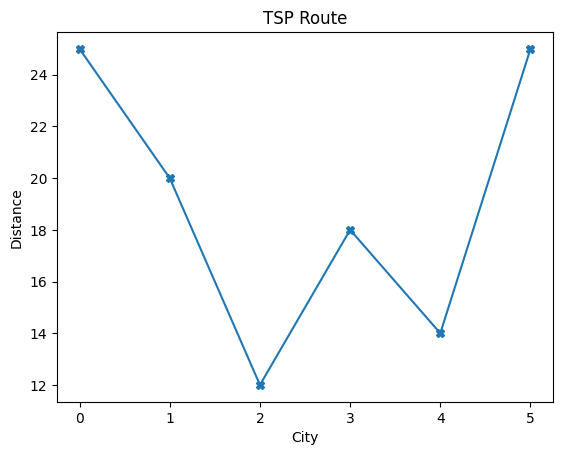


Intermediate routes:


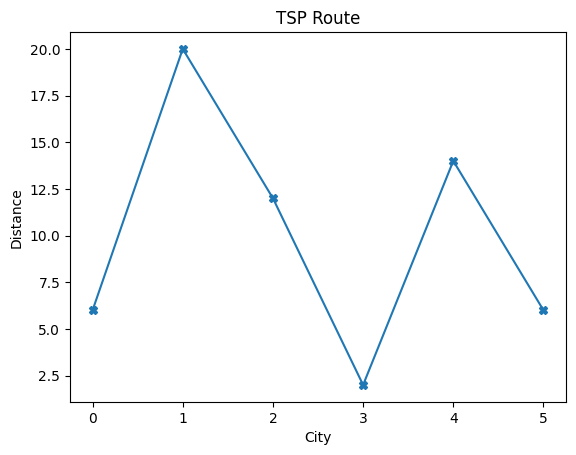


Final route:


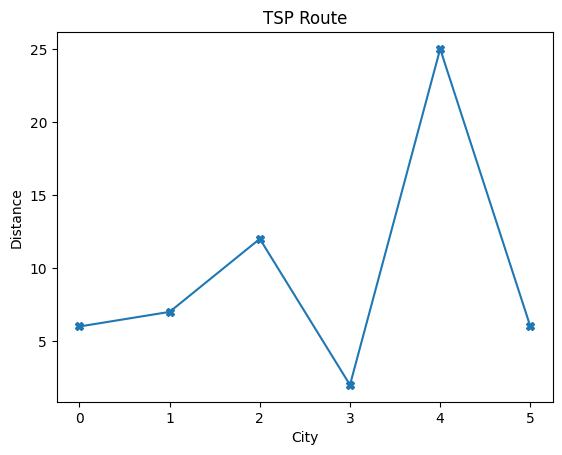

Total distance: 27


In [3]:
import random
import matplotlib.pyplot as plt

def generate_random_route(n):
    route = list(range(n))
    random.shuffle(route)
    return route

def calculate_total_distance(adjacency_matrix, route):
    total_distance = 0
    for i in range(len(route) - 1):
        current_place = route[i]
        next_place = route[i + 1]
        total_distance += adjacency_matrix[current_place][next_place]
    return total_distance

def explore_neighbors(route):
    neighbors = []
    n = len(route)

    for i in range(n):
        for j in range(i + 1, n):
            neighbor = route.copy()
            neighbor[i], neighbor[j] = neighbor[j], neighbor[i]
            neighbors.append(neighbor)

    return neighbors

def hill_climbing(adjacency_matrix):
    n = len(adjacency_matrix)
    current_route = generate_random_route(n)
    current_distance = calculate_total_distance(adjacency_matrix, current_route)
    explored_routes = [current_route]

    while True:
        neighbors = explore_neighbors(current_route)
        best_neighbor = None
        best_distance = current_distance

        for neighbor in neighbors:
            neighbor_distance = calculate_total_distance(adjacency_matrix, neighbor)
            if neighbor_distance < best_distance:
                best_neighbor = neighbor
                best_distance = neighbor_distance

        if best_neighbor is None:
            break

        current_route = best_neighbor
        current_distance = best_distance
        explored_routes.append(current_route)

    return current_route, current_distance, explored_routes

def visualize_route(route, adjacency_matrix):
    n = len(adjacency_matrix)
    x = [i for i in range(n + 1)]
    y = [adjacency_matrix[route[i % n]][route[(i + 1) % n]] for i in range(n + 1)]
    plt.plot(x, y, 'X-')
    plt.xlabel('City')
    plt.ylabel('Distance')
    plt.title('TSP Route')
    plt.show()

# Usage
adjacency_matrix = [
    [0, 7, 20, 15, 12],
    [7, 0, 6, 14, 18],
    [20, 6, 0, 15, 30],
    [15, 14, 25, 0, 2],
    [12, 18, 30, 2, 0]
]

best_route, best_distance, explored_routes = hill_climbing(adjacency_matrix)

print("Initial route:")
visualize_route(explored_routes[0], adjacency_matrix)
print()

print("Intermediate routes:")
for route in explored_routes[1:-1]:
    visualize_route(route, adjacency_matrix)
    print()

print("Final route:")
visualize_route(explored_routes[-1], adjacency_matrix)
print(f"Total distance: {best_distance}")